<a href="https://colab.research.google.com/github/DEADL0CKK/netflix_dataset/blob/main/netflix_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1161]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


In [1162]:
netflix = pd.read_csv(r'/content/drive/MyDrive/IPSSI/Machine_Learning/netflix-rotten-tomatoes-metacritic-imdb.csv')
print(netflix.columns)


Index(['Title', 'Genre', 'Tags', 'Languages', 'Series or Movie',
       'Hidden Gem Score', 'Country Availability', 'Runtime', 'Director',
       'Writer', 'Actors', 'View Rating', 'IMDb Score',
       'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received',
       'Awards Nominated For', 'Boxoffice', 'Release Date',
       'Netflix Release Date', 'Production House', 'Netflix Link', 'IMDb Link',
       'Summary', 'IMDb Votes', 'Image', 'Poster', 'TMDb Trailer',
       'Trailer Site'],
      dtype='object')


In [1163]:
#Nettoyage
df_netflix = netflix.copy()
df_netflix = df_netflix.drop(['Tags','Awards Nominated For','Netflix Link','IMDb Link','Summary','IMDb Votes','Image','Poster','TMDb Trailer','Trailer Site','Title'],axis=1)
df_netflix

,Genre,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Boxoffice,Release Date,Netflix Release Date,Production House
0,"Crime, Drama, Fantasy, Horror, Romance","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,"Kåre Hedebrant, Per Ragnar, Lina Leandersson, ...",R,7.9,98.0,82.0,74.0,"$2,122,065",12 Dec 2008,2021-03-04,"Canal+, Sandrew Metronome"
1,Comedy,English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,"Paddy Considine, Cleo, Beanie Feldstein, Dónal...",R,5.8,79.0,69.0,1.0,"$70,632",08 May 2020,2021-03-04,"Film 4, Monumental Pictures, Lionsgate"
2,"Drama, Thriller",English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon","Genesis Rodriguez, Vincent Piazza",Unrated,4.3,NaN,46.0,NaN,"$16,263",28 Aug 2020,2021-03-04,NaN
3,Drama,Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,"Vahide Perçin, Gonca Vuslateri, Cansu Dere, Be...",NaN,6.5,NaN,NaN,1.0,NaN,01 Oct 2016,2021-03-04,NaN
4,"Animation, Short, Drama",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,Ragga Gudrun,NaN,6.3,NaN,NaN,NaN,NaN,22 Sep 2011,2021-03-04,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15475,NaN,NaN,Series,NaN,"South Korea,Argentina,United Kingdom,Australia...",< 30 minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-14,NaN
15476,NaN,NaN,Series,NaN,"Russia,Hong Kong,Hungary,Australia,South Korea...",< 30 minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-14,NaN
15477,"Animation, Comedy, Family",English,Series,8.4,"Belgium,Switzerland,United States,Germany,Unit...",< 30 minutes,NaN,NaN,Jung Hyun Kim,NaN,6.8,NaN,NaN,NaN,NaN,NaN,2015-04-14,NaN
15478,"Animation, Comedy, Family",English,Series,8.2,"Belgium,Switzerland,Germany,Argentina,United K...",< 30 minutes,NaN,NaN,NaN,Unrated,6.4,NaN,NaN,NaN,NaN,NaN,2015-04-14,Fox


In [1164]:
df_netflix.describe()

,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received
count,13379.000000,13381.000000,6382.000000,4336.000000,6075.000000
mean,5.937551,6.496054,59.523034,56.813653,8.764444
std,2.250202,1.146910,26.999173,17.582545,18.311171
min,0.600000,1.000000,0.000000,5.000000,1.000000
25%,3.800000,5.800000,38.000000,44.000000,1.000000
50%,6.800000,6.600000,64.000000,57.000000,3.000000
75%,7.900000,7.300000,83.000000,70.000000,8.000000
max,9.800000,9.700000,100.000000,100.000000,300.000000


In [1165]:
df_netflix.describe(include=['O'])

,Genre,Languages,Series or Movie,Country Availability,Runtime,Director,Writer,Actors,View Rating,Boxoffice,Release Date,Netflix Release Date,Production House
count,13770,13545,15480,15461,15479,10772,11150,13555,8456,4007,13373,15480,5149
unique,1780,1438,2,7530,4,6746,9650,12934,28,3836,5314,1823,3814
top,Comedy,English,Movie,Japan,1-2 hour,Steven Spielberg,Fujio F. Fujiko,"Noriko Ohara, Nobuyo Ôyama, Kaneta Kimotsuki, ...",R,"$474,544,677",12 Oct 2018,2015-04-14,Netflix
freq,1186,5133,11697,1339,9121,28,17,15,2096,12,24,2407,82


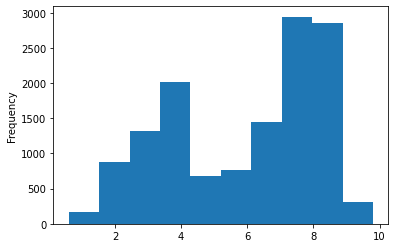

In [1166]:
#Score qui determine la note d'un film selon sa note d'évaluation par rapport à sa popularité
df_netflix['Hidden Gem Score'].plot.hist()

In [1167]:
#Corrélation sur tous les scores present dans le dataset
# Il y a une corrélation plus présente dans le Score Metacritique et le score rotten tomatoes
corr = df_netflix.corr()

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`


,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received
Hidden Gem Score,1.00,0.12,0.40,0.52,-0.11
IMDb Score,0.12,1.00,0.71,0.72,0.29
Rotten Tomatoes Score,0.40,0.71,1.00,0.90,0.30
Metacritic Score,0.52,0.72,0.90,1.00,0.43
Awards Received,-0.11,0.29,0.30,0.43,1.00


In [1168]:
# analyse du temps de durée du contenu présent
df_netflix.Runtime.value_counts(normalize=True)*100

1-2 hour        58.924995
< 30 minutes    25.815621
> 2 hrs         13.101622
30-60 mins       2.157762
Name: Runtime, dtype: float64

In [1169]:
df_netflix['Series or Movie'].value_counts(normalize=True)*100

Movie     75.562016
Series    24.437984
Name: Series or Movie, dtype: float64

In [1170]:
df_netflix = df_netflix.dropna()

In [1171]:
corr = df_netflix.corr()

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`


,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received
Hidden Gem Score,1.00,0.54,0.76,0.71,0.27
IMDb Score,0.54,1.00,0.75,0.73,0.42
Rotten Tomatoes Score,0.76,0.75,1.00,0.91,0.37
Metacritic Score,0.71,0.73,0.91,1.00,0.47
Awards Received,0.27,0.42,0.37,0.47,1.00


In [1172]:
df_netflix.dtypes

Genre                     object
Languages                 object
Series or Movie           object
Hidden Gem Score         float64
Country Availability      object
Runtime                   object
Director                  object
Writer                    object
Actors                    object
View Rating               object
IMDb Score               float64
Rotten Tomatoes Score    float64
Metacritic Score         float64
Awards Received          float64
Boxoffice                 object
Release Date              object
Netflix Release Date      object
Production House          object
dtype: object

In [1173]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df_netflix.columns : 
    if df_netflix[col].dtypes == 'object' : 
        print(col)
        le = LabelEncoder()
        df_netflix[col] = le.fit_transform(df_netflix[col])

df_netflix

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Genre
Languages
Series or Movie
Country Availability
Runtime
Director
Writer
Actors
View Rating
Boxoffice
Release Date
Netflix Release Date
Production House


,Genre,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Boxoffice,Release Date,Netflix Release Date,Production House
0,435,500,1,4.3,1335,1,1140,961,1217,9,7.9,98.0,82.0,74.0,736,508,715,260
1,357,22,0,7.0,123,0,204,258,1605,9,5.8,79.0,69.0,1.0,1915,332,715,565
15,452,22,0,3.5,792,0,1127,1681,1040,9,8.4,68.0,59.0,112.0,1215,169,714,241
16,54,311,0,2.8,793,0,378,697,1259,6,6.5,52.0,51.0,26.0,1510,870,714,905
17,216,22,0,4.4,794,0,261,1778,1678,7,8.1,96.0,85.0,46.0,1315,660,714,705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15456,394,159,0,2.7,426,0,907,707,1836,7,6.8,45.0,48.0,6.0,306,555,0,331
15457,437,22,0,2.5,1184,2,963,73,1188,7,6.8,36.0,48.0,1.0,2048,1319,0,1549
15459,320,187,0,3.0,681,0,238,1089,875,7,6.8,63.0,52.0,3.0,138,1203,0,1287
15460,219,266,0,2.0,180,2,118,1764,240,7,4.9,25.0,45.0,11.0,1037,830,0,1494


# Arbre de Décision

In [1174]:
x= df_netflix.drop('Series or Movie',axis=1)
y = df_netflix['Series or Movie']

In [1175]:
# Avec stratification, impossible car plus de 2 valeurs
x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

In [1176]:
y_train.value_counts(normalize=True)*100

0    97.927461
1     2.072539
Name: Series or Movie, dtype: float64

In [1177]:
y_test.value_counts(normalize=True)*100

0    97.927461
1     2.072539
Name: Series or Movie, dtype: float64

In [1178]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)
tree

DecisionTreeClassifier(random_state=42)

In [1179]:
df_netflix.isna().sum()

Genre                    0
Languages                0
Series or Movie          0
Hidden Gem Score         0
Country Availability     0
Runtime                  0
Director                 0
Writer                   0
Actors                   0
View Rating              0
IMDb Score               0
Rotten Tomatoes Score    0
Metacritic Score         0
Awards Received          0
Boxoffice                0
Release Date             0
Netflix Release Date     0
Production House         0
dtype: int64

In [1180]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [1181]:
y_pred = tree.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [1182]:
y_test.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [1183]:
score = tree.score(x_test, y_test)
score

0.9896373056994818

In [1184]:
scores=[]
for max_depth in range(2, 10) : 
    tree=DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    tree.fit(x_train, y_train)
    score=tree.score(x_test, y_test)
    scores.append(score*100)

scores

[97.58203799654576,
 98.61830742659758,
 98.61830742659758,
 97.92746113989638,
 97.75474956822107,
 98.96373056994818,
 98.96373056994818,
 98.96373056994818]

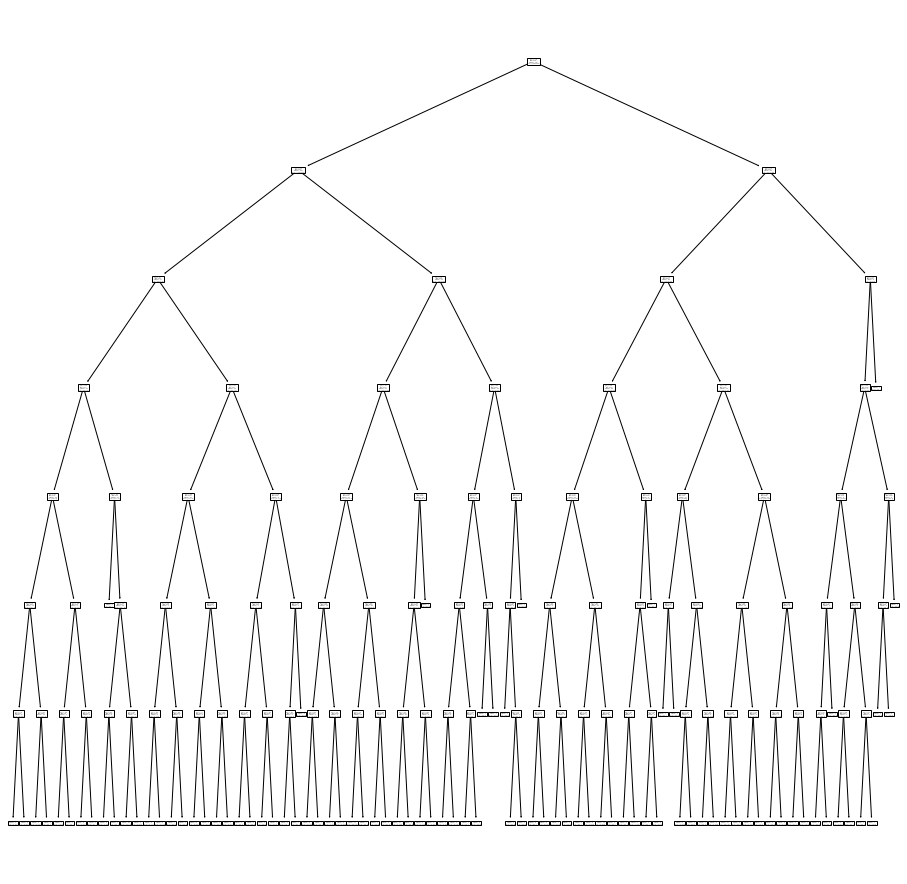

In [1296]:
from sklearn.tree import plot_tree
tree=DecisionTreeClassifier(max_depth=7, random_state=42)
tree.fit(x_train, y_train)
plt.figure(figsize = (16, 16))
#Rendre l'arbre plus agréable
tree_ban_tcg = plot_tree(tree)

# Application du KMeans avec Test Concluant

In [1307]:
#Nettoyage
df_netflix = netflix.copy()
df_netflix = df_netflix.drop(['Tags','Awards Nominated For','Netflix Link','IMDb Link','Summary','IMDb Votes','Image','Poster','TMDb Trailer','Trailer Site','Title'],axis=1)
df_netflix

,Genre,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Boxoffice,Release Date,Netflix Release Date,Production House
0,"Crime, Drama, Fantasy, Horror, Romance","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,"Kåre Hedebrant, Per Ragnar, Lina Leandersson, ...",R,7.9,98.0,82.0,74.0,"$2,122,065",12 Dec 2008,2021-03-04,"Canal+, Sandrew Metronome"
1,Comedy,English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,"Paddy Considine, Cleo, Beanie Feldstein, Dónal...",R,5.8,79.0,69.0,1.0,"$70,632",08 May 2020,2021-03-04,"Film 4, Monumental Pictures, Lionsgate"
2,"Drama, Thriller",English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon","Genesis Rodriguez, Vincent Piazza",Unrated,4.3,NaN,46.0,NaN,"$16,263",28 Aug 2020,2021-03-04,NaN
3,Drama,Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,"Vahide Perçin, Gonca Vuslateri, Cansu Dere, Be...",NaN,6.5,NaN,NaN,1.0,NaN,01 Oct 2016,2021-03-04,NaN
4,"Animation, Short, Drama",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,Ragga Gudrun,NaN,6.3,NaN,NaN,NaN,NaN,22 Sep 2011,2021-03-04,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15475,NaN,NaN,Series,NaN,"South Korea,Argentina,United Kingdom,Australia...",< 30 minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-14,NaN
15476,NaN,NaN,Series,NaN,"Russia,Hong Kong,Hungary,Australia,South Korea...",< 30 minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-14,NaN
15477,"Animation, Comedy, Family",English,Series,8.4,"Belgium,Switzerland,United States,Germany,Unit...",< 30 minutes,NaN,NaN,Jung Hyun Kim,NaN,6.8,NaN,NaN,NaN,NaN,NaN,2015-04-14,NaN
15478,"Animation, Comedy, Family",English,Series,8.2,"Belgium,Switzerland,Germany,Argentina,United K...",< 30 minutes,NaN,NaN,NaN,Unrated,6.4,NaN,NaN,NaN,NaN,NaN,2015-04-14,Fox


In [1308]:
df_netflix = df_netflix.set_index('Runtime')


In [1309]:
df_netflix

,Genre,Languages,Series or Movie,Hidden Gem Score,Country Availability,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Boxoffice,Release Date,Netflix Release Date,Production House
Runtime,,,,,,,,,,,,,,,,,
< 30 minutes,"Crime, Drama, Fantasy, Horror, Romance","Swedish, Spanish",Series,4.3,Thailand,Tomas Alfredson,John Ajvide Lindqvist,"Kåre Hedebrant, Per Ragnar, Lina Leandersson, ...",R,7.9,98.0,82.0,74.0,"$2,122,065",12 Dec 2008,2021-03-04,"Canal+, Sandrew Metronome"
1-2 hour,Comedy,English,Movie,7.0,Canada,Coky Giedroyc,Caitlin Moran,"Paddy Considine, Cleo, Beanie Feldstein, Dónal...",R,5.8,79.0,69.0,1.0,"$70,632",08 May 2020,2021-03-04,"Film 4, Monumental Pictures, Lionsgate"
1-2 hour,"Drama, Thriller",English,Movie,6.4,Canada,Brendan Walsh,"Brendan Walsh, Daley Nixon","Genesis Rodriguez, Vincent Piazza",Unrated,4.3,NaN,46.0,NaN,"$16,263",28 Aug 2020,2021-03-04,NaN
< 30 minutes,Drama,Turkish,Series,7.7,"Belgium,Netherlands",NaN,NaN,"Vahide Perçin, Gonca Vuslateri, Cansu Dere, Be...",NaN,6.5,NaN,NaN,1.0,NaN,01 Oct 2016,2021-03-04,NaN
1-2 hour,"Animation, Short, Drama",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",Stephen Irwin,NaN,Ragga Gudrun,NaN,6.3,NaN,NaN,NaN,NaN,22 Sep 2011,2021-03-04,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
< 30 minutes,NaN,NaN,Series,NaN,"South Korea,Argentina,United Kingdom,Australia...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-14,NaN
< 30 minutes,NaN,NaN,Series,NaN,"Russia,Hong Kong,Hungary,Australia,South Korea...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-14,NaN
< 30 minutes,"Animation, Comedy, Family",English,Series,8.4,"Belgium,Switzerland,United States,Germany,Unit...",NaN,NaN,Jung Hyun Kim,NaN,6.8,NaN,NaN,NaN,NaN,NaN,2015-04-14,NaN


In [1310]:
df_netflix = df_netflix.drop(['Genre','Languages','Series or Movie','Country Availability','Director','Writer','Actors','View Rating','Boxoffice','Release Date','Netflix Release Date','Production House'],axis=1)

df_netflix = df_netflix.dropna()


In [1311]:
df_netflix.describe()
len(pd.unique(df_netflix.index))

3

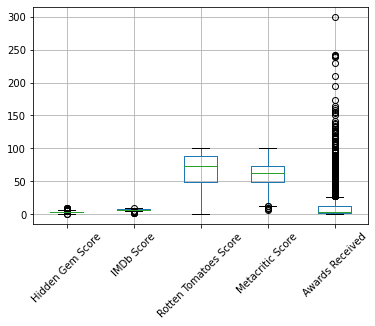

In [1312]:
df_netflix.boxplot(rot=45)

In [1313]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

# for col in df_netflix.columns : 
#     if df_netflix[col].dtypes == 'object' : 
#         print(col)
#         le = LabelEncoder()
#         df_netflix[col] = le.fit_transform(df_netflix[col])
# df_netflix

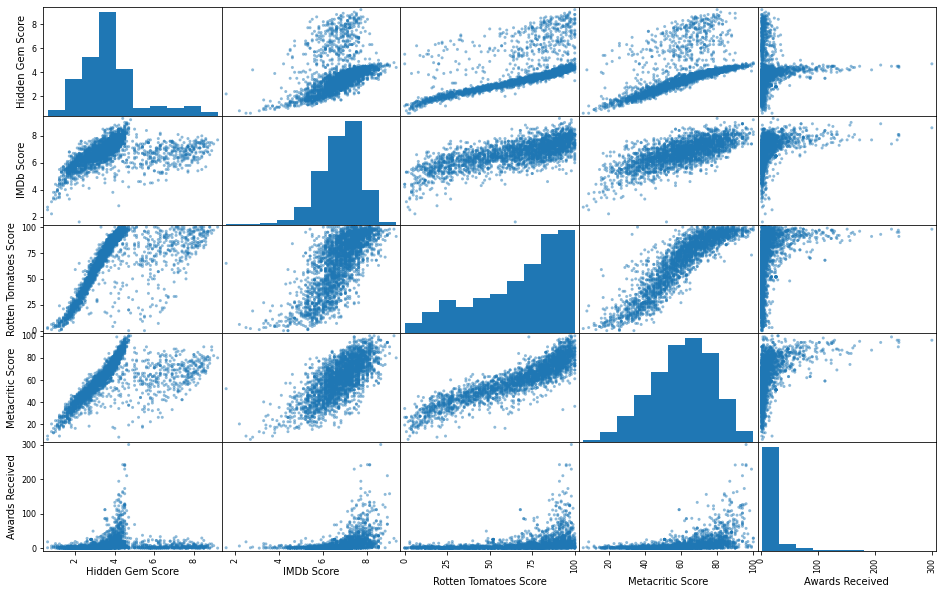

In [1314]:
from pandas.plotting import scatter_matrix
scatter_mat = scatter_matrix(df_netflix, figsize = (16,10))

In [1315]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df_minmax = min_max.fit_transform(df_netflix)
df_minmax
df_scale = scale(df_netflix)


In [1316]:
pd.DataFrame(df_minmax, columns=df_netflix.columns, index=df_netflix.index)

,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received
Runtime,,,,,
< 30 minutes,0.430233,0.818182,0.98,0.808511,0.244147
1-2 hour,0.744186,0.545455,0.79,0.670213,0.000000
1-2 hour,0.337209,0.883117,0.68,0.563830,0.371237
1-2 hour,0.255814,0.636364,0.52,0.478723,0.083612
1-2 hour,0.441860,0.844156,0.96,0.840426,0.150502
...,...,...,...,...,...
1-2 hour,0.279070,0.675325,0.63,0.489362,0.006689
> 2 hrs,0.162791,0.428571,0.25,0.414894,0.033445
1-2 hour,0.081395,0.480519,0.02,0.170213,0.000000


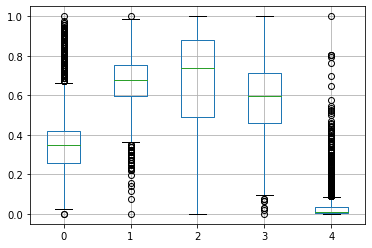

In [1195]:
pd.DataFrame(df_minmax).boxplot()

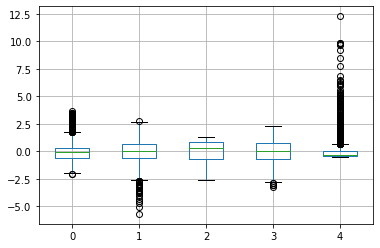

In [1196]:
pd.DataFrame(df_scale).boxplot()

In [1318]:
from sklearn import cluster
kmeans_minmax = cluster.KMeans(n_clusters=3, random_state=42)
kmeans_minmax.fit(df_minmax)

KMeans(n_clusters=3, random_state=42)

In [1319]:
kmeans_minmax.labels_

array([0, 0, 2, ..., 1, 1, 0], dtype=int32)

In [1320]:
kmeans_minmax.inertia_,

(134.77250106021793,)

In [1321]:
kmeans_orig = cluster.KMeans(n_clusters=3, random_state=42)
kmeans_orig.fit(df_netflix)
kmeans_orig.labels_

array([1, 0, 1, ..., 2, 2, 0], dtype=int32)

In [1322]:
df_netflix['cl_minmax']=kmeans_minmax.labels_
df_netflix.sort_values('cl_minmax')
df_netflix.sort_values('cl_minmax')

,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,cl_minmax
Runtime,,,,,,
< 30 minutes,4.3,7.9,98.0,82.0,74.0,0
1-2 hour,3.7,6.7,85.0,70.0,2.0,0
> 2 hrs,4.5,8.1,91.0,97.0,20.0,0
> 2 hrs,3.8,7.2,82.0,76.0,9.0,0
> 2 hrs,4.5,8.3,98.0,86.0,13.0,0
...,...,...,...,...,...,...
1-2 hour,2.9,6.3,59.0,54.0,1.0,2
> 2 hrs,3.3,6.9,69.0,62.0,1.0,2
1-2 hour,2.9,6.4,50.0,58.0,3.0,2


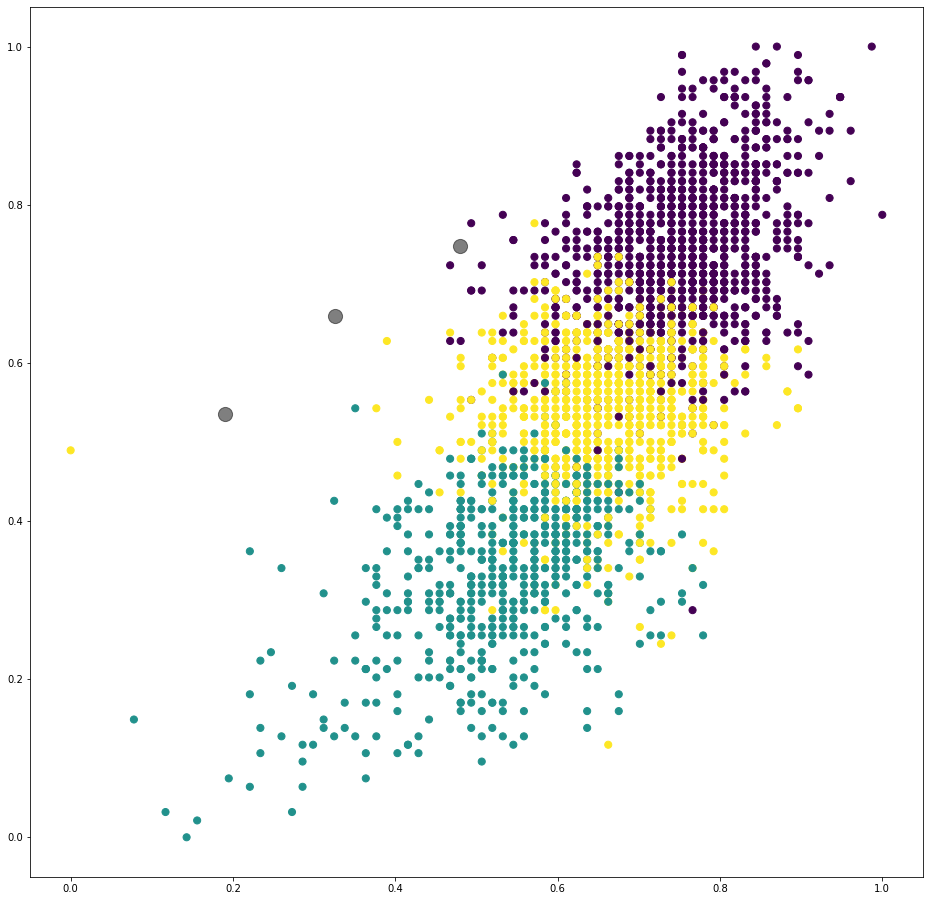

In [1325]:
y_kmeans = kmeans_minmax.predict(df_minmax)
centers = kmeans_minmax.cluster_centers_
plt.figure(figsize=(16,16))
#les deux df c'est les colonnes
# quelles colonnes queréller
plt.scatter(df_minmax[ : , 1], df_minmax[ : , 3], c=y_kmeans, s=50, cmap='viridis')
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'y'}
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

# Application du KMeans avec Test Non Concluant

In [1203]:
#Nettoyage
df_netflix = netflix.copy()
df_netflix = df_netflix.drop(['Tags','Awards Nominated For','Netflix Link','IMDb Link','Summary','IMDb Votes','Image','Poster','TMDb Trailer','Trailer Site','Title'],axis=1)
df_netflix

,Genre,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Boxoffice,Release Date,Netflix Release Date,Production House
0,"Crime, Drama, Fantasy, Horror, Romance","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,"Kåre Hedebrant, Per Ragnar, Lina Leandersson, ...",R,7.9,98.0,82.0,74.0,"$2,122,065",12 Dec 2008,2021-03-04,"Canal+, Sandrew Metronome"
1,Comedy,English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,"Paddy Considine, Cleo, Beanie Feldstein, Dónal...",R,5.8,79.0,69.0,1.0,"$70,632",08 May 2020,2021-03-04,"Film 4, Monumental Pictures, Lionsgate"
2,"Drama, Thriller",English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon","Genesis Rodriguez, Vincent Piazza",Unrated,4.3,NaN,46.0,NaN,"$16,263",28 Aug 2020,2021-03-04,NaN
3,Drama,Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,"Vahide Perçin, Gonca Vuslateri, Cansu Dere, Be...",NaN,6.5,NaN,NaN,1.0,NaN,01 Oct 2016,2021-03-04,NaN
4,"Animation, Short, Drama",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,Ragga Gudrun,NaN,6.3,NaN,NaN,NaN,NaN,22 Sep 2011,2021-03-04,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15475,NaN,NaN,Series,NaN,"South Korea,Argentina,United Kingdom,Australia...",< 30 minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-14,NaN
15476,NaN,NaN,Series,NaN,"Russia,Hong Kong,Hungary,Australia,South Korea...",< 30 minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-14,NaN
15477,"Animation, Comedy, Family",English,Series,8.4,"Belgium,Switzerland,United States,Germany,Unit...",< 30 minutes,NaN,NaN,Jung Hyun Kim,NaN,6.8,NaN,NaN,NaN,NaN,NaN,2015-04-14,NaN
15478,"Animation, Comedy, Family",English,Series,8.2,"Belgium,Switzerland,Germany,Argentina,United K...",< 30 minutes,NaN,NaN,NaN,Unrated,6.4,NaN,NaN,NaN,NaN,NaN,2015-04-14,Fox


In [1204]:
df_netflix = df_netflix.set_index('Runtime')


In [1205]:
df_netflix

,Genre,Languages,Series or Movie,Hidden Gem Score,Country Availability,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Boxoffice,Release Date,Netflix Release Date,Production House
Runtime,,,,,,,,,,,,,,,,,
< 30 minutes,"Crime, Drama, Fantasy, Horror, Romance","Swedish, Spanish",Series,4.3,Thailand,Tomas Alfredson,John Ajvide Lindqvist,"Kåre Hedebrant, Per Ragnar, Lina Leandersson, ...",R,7.9,98.0,82.0,74.0,"$2,122,065",12 Dec 2008,2021-03-04,"Canal+, Sandrew Metronome"
1-2 hour,Comedy,English,Movie,7.0,Canada,Coky Giedroyc,Caitlin Moran,"Paddy Considine, Cleo, Beanie Feldstein, Dónal...",R,5.8,79.0,69.0,1.0,"$70,632",08 May 2020,2021-03-04,"Film 4, Monumental Pictures, Lionsgate"
1-2 hour,"Drama, Thriller",English,Movie,6.4,Canada,Brendan Walsh,"Brendan Walsh, Daley Nixon","Genesis Rodriguez, Vincent Piazza",Unrated,4.3,NaN,46.0,NaN,"$16,263",28 Aug 2020,2021-03-04,NaN
< 30 minutes,Drama,Turkish,Series,7.7,"Belgium,Netherlands",NaN,NaN,"Vahide Perçin, Gonca Vuslateri, Cansu Dere, Be...",NaN,6.5,NaN,NaN,1.0,NaN,01 Oct 2016,2021-03-04,NaN
1-2 hour,"Animation, Short, Drama",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",Stephen Irwin,NaN,Ragga Gudrun,NaN,6.3,NaN,NaN,NaN,NaN,22 Sep 2011,2021-03-04,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
< 30 minutes,NaN,NaN,Series,NaN,"South Korea,Argentina,United Kingdom,Australia...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-14,NaN
< 30 minutes,NaN,NaN,Series,NaN,"Russia,Hong Kong,Hungary,Australia,South Korea...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-14,NaN
< 30 minutes,"Animation, Comedy, Family",English,Series,8.4,"Belgium,Switzerland,United States,Germany,Unit...",NaN,NaN,Jung Hyun Kim,NaN,6.8,NaN,NaN,NaN,NaN,NaN,2015-04-14,NaN


In [1206]:
# df_netflix = df_netflix.drop(['Genre','Languages','Series or Movie','Country Availability','Director','Writer','Actors','View Rating','Boxoffice','Release Date','Netflix Release Date','Production House'],axis=1)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df_netflix.columns : 
    if df_netflix[col].dtypes == 'object' : 
        print(col)
        le = LabelEncoder()
        df_netflix[col] = le.fit_transform(df_netflix[col])

df_netflix = df_netflix.dropna()

Genre
Languages
Series or Movie
Country Availability
Director
Writer
Actors
View Rating
Boxoffice
Release Date
Netflix Release Date
Production House


In [1207]:
df_netflix.describe()

,Genre,Languages,Series or Movie,Hidden Gem Score,Country Availability,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Boxoffice,Release Date,Netflix Release Date,Production House
count,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000
mean,990.381088,380.988980,0.021685,3.724778,4086.190899,3280.750089,4805.349804,6253.295414,14.056168,6.766228,66.415926,60.834696,12.169925,2117.818343,2790.521152,504.186989,2093.002133
std,528.057707,338.293161,0.145679,1.503514,2140.134238,1930.601323,2828.816276,3712.465299,3.312501,0.908129,25.652213,17.069956,23.455633,1216.806919,1480.452734,603.154474,1172.123465
min,0.000000,6.000000,0.000000,0.600000,1.000000,8.000000,0.000000,4.000000,1.000000,1.600000,0.000000,6.000000,1.000000,2.000000,9.000000,0.000000,5.000000
25%,398.000000,135.000000,0.000000,2.800000,2215.000000,1540.000000,2329.000000,3052.000000,13.000000,6.200000,49.000000,49.000000,2.000000,1019.000000,1566.000000,0.000000,1033.000000
50%,1155.000000,149.000000,0.000000,3.600000,4055.000000,3055.000000,4549.000000,5997.000000,13.000000,6.800000,74.000000,62.000000,4.000000,2118.000000,2891.000000,190.000000,2149.000000
75%,1464.000000,625.000000,0.000000,4.200000,6030.000000,4957.000000,7275.000000,9412.000000,15.000000,7.400000,88.000000,73.000000,12.000000,3247.000000,4037.000000,1001.000000,3152.000000
max,1778.000000,1437.000000,1.000000,9.200000,7530.000000,6746.000000,9650.000000,12934.000000,28.000000,9.300000,100.000000,100.000000,300.000000,3836.000000,5312.000000,1822.000000,3814.000000


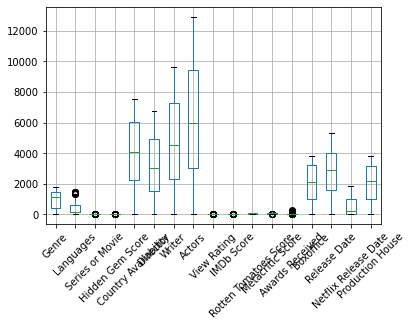

In [1208]:
df_netflix.boxplot(rot=45)

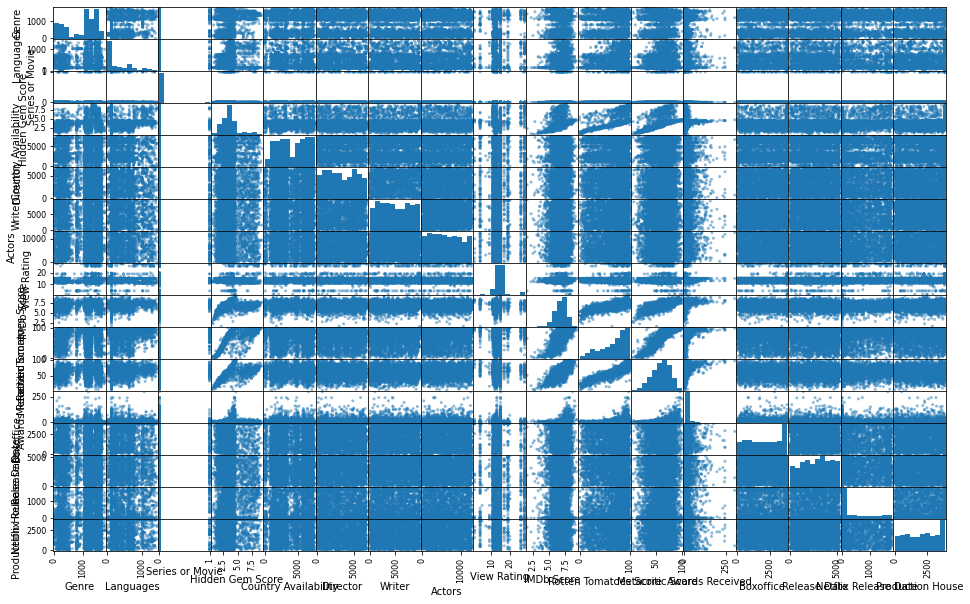

In [1209]:
from pandas.plotting import scatter_matrix
scatter_mat = scatter_matrix(df_netflix, figsize = (16,10))

In [1210]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df_minmax = min_max.fit_transform(df_netflix)
df_minmax
df_scale = scale(df_netflix)


In [1211]:
pd.DataFrame(df_minmax, columns=df_netflix.columns, index=df_netflix.index)

,Genre,Languages,Series or Movie,Hidden Gem Score,Country Availability,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Boxoffice,Release Date,Netflix Release Date,Production House
Runtime,,,,,,,,,,,,,,,,,
< 30 minutes,0.724409,0.953878,1.0,0.430233,0.879400,0.923271,0.444663,0.531168,0.518519,0.818182,0.98,0.808511,0.244147,0.313772,0.386385,1.000000,0.145445
1-2 hour,0.628796,0.090147,0.0,0.744186,0.173197,0.162066,0.129948,0.716937,0.518519,0.545455,0.79,0.670213,0.000000,0.874022,0.270790,1.000000,0.308480
1-2 hour,0.742970,0.090147,0.0,0.337209,0.527294,0.917335,0.834093,0.436968,0.518519,0.883117,0.68,0.563830,0.371237,0.548513,0.143692,0.999451,0.133106
1-2 hour,0.082677,0.432565,0.0,0.255814,0.527959,0.291481,0.309741,0.550271,0.407407,0.636364,0.52,0.478723,0.083612,0.692749,0.632095,0.999451,0.509057
1-2 hour,0.281777,0.090147,0.0,0.441860,0.528224,0.206144,0.880518,0.754060,0.444444,0.844156,0.96,0.840426,0.150502,0.598070,0.499340,0.999451,0.395379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1-2 hour,0.593363,0.289308,0.0,0.279070,0.442157,0.197091,0.490466,0.383759,0.444444,0.675325,0.63,0.489362,0.006689,0.069901,0.832548,0.000000,0.719611
> 2 hrs,0.284027,0.385045,0.0,0.162791,0.196042,0.100772,0.878549,0.110828,0.444444,0.428571,0.25,0.414894,0.033445,0.459311,0.604375,0.000000,0.846679
1-2 hour,0.119798,0.090147,0.0,0.081395,0.173197,0.462600,0.559896,0.446172,0.444444,0.480519,0.02,0.170213,0.000000,0.428534,0.876674,0.000000,0.475453


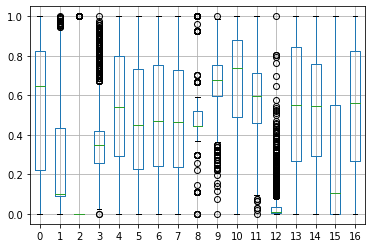

In [1212]:
pd.DataFrame(df_minmax).boxplot()

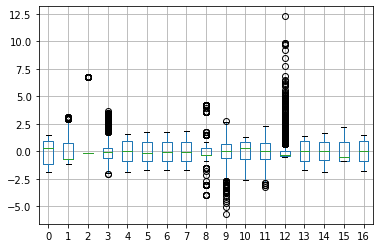

In [1213]:
pd.DataFrame(df_scale).boxplot()

In [1214]:
from sklearn import cluster
kmeans_minmax = cluster.KMeans(n_clusters=4, random_state=42)
kmeans_minmax.fit(df_minmax)

KMeans(n_clusters=4, random_state=42)

In [1215]:
kmeans_minmax.labels_

array([3, 3, 3, ..., 1, 1, 0], dtype=int32)

In [1216]:
kmeans_minmax.inertia_,

(2350.278044585317,)

In [1217]:
kmeans_orig = cluster.KMeans(n_clusters=4, random_state=42)
kmeans_orig.fit(df_netflix)
kmeans_orig.labels_

array([1, 0, 3, ..., 3, 2, 1], dtype=int32)

In [1218]:
df_netflix['cl_minmax']=kmeans_minmax.labels_
df_netflix.sort_values('cl_minmax')
df_netflix.sort_values('cl_minmax')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Genre,Languages,Series or Movie,Hidden Gem Score,Country Availability,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Boxoffice,Release Date,Netflix Release Date,Production House,cl_minmax
Runtime,,,,,,,,,,,,,,,,,,
> 2 hrs,1584,135,0,4.4,2437,5785,8393,7423,15,8.0,94.0,90.0,83.0,1598,1712,166,186,0
1-2 hour,1122,135,0,3.0,4419,6058,7646,8944,15,6.8,50.0,63.0,1.0,3188,2754,105,1616,0
1-2 hour,239,135,0,3.8,6320,1584,6113,492,13,7.5,82.0,69.0,17.0,1976,2227,105,2024,0
> 2 hrs,531,135,0,3.6,6755,1397,8497,9948,13,7.7,77.0,65.0,15.0,1797,3375,109,1515,0
1-2 hour,295,54,0,3.4,5198,6060,8884,1210,11,6.5,75.0,66.0,6.0,601,4112,109,1091,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
> 2 hrs,1268,724,0,3.6,6961,3004,5406,9133,15,6.8,81.0,67.0,5.0,1925,554,1431,2586,3
1-2 hour,1464,972,0,7.4,2543,1786,2745,9660,28,7.1,97.0,73.0,7.0,4,204,1443,1744,3
1-2 hour,1464,135,0,8.6,859,4582,6759,9122,28,5.7,89.0,80.0,3.0,3836,2821,1444,2848,3


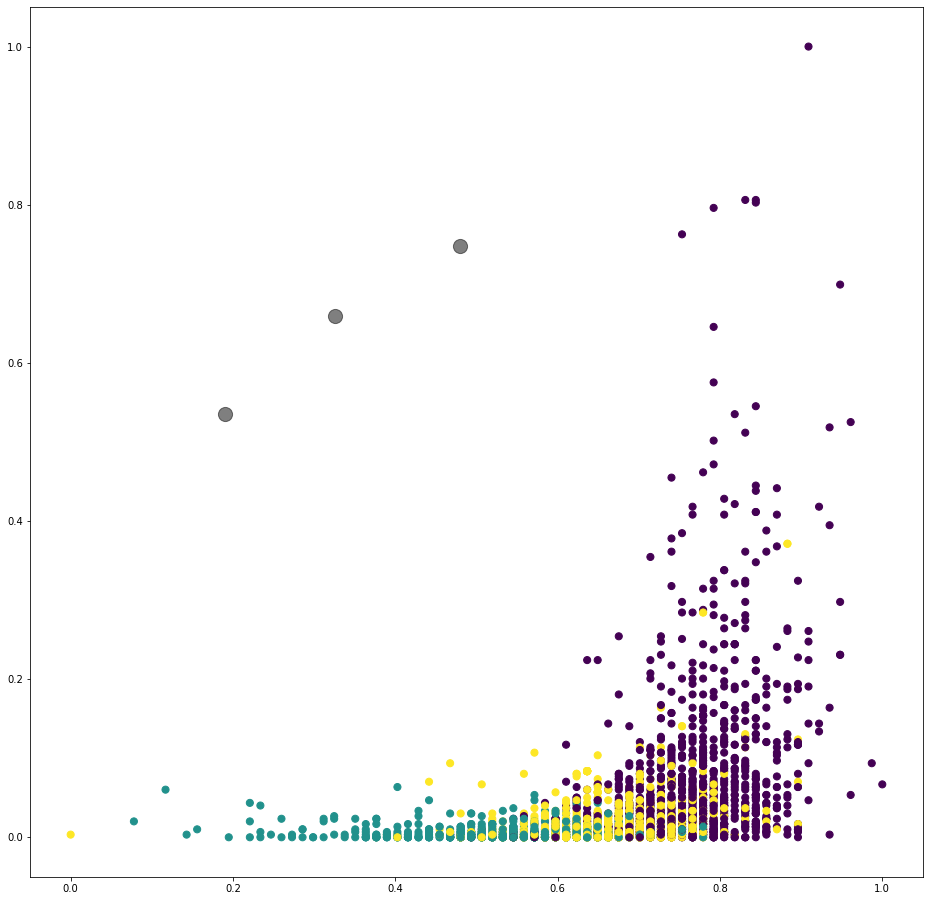

In [1348]:
y_kmeans = kmeans_minmax.predict(df_minmax)
centers = kmeans_minmax.cluster_centers_
plt.figure(figsize=(16,16))
plt.scatter(df_minmax[ : , 1], df_minmax[ : , 4], c=y_kmeans, s=50, cmap='viridis')
colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'y'}
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

# Knn 

In [1220]:
#Nettoyage
df_netflix = netflix.copy()
df_netflix = df_netflix.drop(['Tags','Awards Nominated For','Netflix Link','IMDb Link','Summary','IMDb Votes','Image','Poster','TMDb Trailer','Trailer Site','Title'],axis=1)
df_netflix

,Genre,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Boxoffice,Release Date,Netflix Release Date,Production House
0,"Crime, Drama, Fantasy, Horror, Romance","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,"Kåre Hedebrant, Per Ragnar, Lina Leandersson, ...",R,7.9,98.0,82.0,74.0,"$2,122,065",12 Dec 2008,2021-03-04,"Canal+, Sandrew Metronome"
1,Comedy,English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,"Paddy Considine, Cleo, Beanie Feldstein, Dónal...",R,5.8,79.0,69.0,1.0,"$70,632",08 May 2020,2021-03-04,"Film 4, Monumental Pictures, Lionsgate"
2,"Drama, Thriller",English,Movie,6.4,Canada,1-2 hour,Brendan Walsh,"Brendan Walsh, Daley Nixon","Genesis Rodriguez, Vincent Piazza",Unrated,4.3,NaN,46.0,NaN,"$16,263",28 Aug 2020,2021-03-04,NaN
3,Drama,Turkish,Series,7.7,"Belgium,Netherlands",< 30 minutes,NaN,NaN,"Vahide Perçin, Gonca Vuslateri, Cansu Dere, Be...",NaN,6.5,NaN,NaN,1.0,NaN,01 Oct 2016,2021-03-04,NaN
4,"Animation, Short, Drama",English,Movie,8.1,"Lithuania,Poland,France,Iceland,Italy,Spain,Gr...",1-2 hour,Stephen Irwin,NaN,Ragga Gudrun,NaN,6.3,NaN,NaN,NaN,NaN,22 Sep 2011,2021-03-04,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15475,NaN,NaN,Series,NaN,"South Korea,Argentina,United Kingdom,Australia...",< 30 minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-14,NaN
15476,NaN,NaN,Series,NaN,"Russia,Hong Kong,Hungary,Australia,South Korea...",< 30 minutes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-04-14,NaN
15477,"Animation, Comedy, Family",English,Series,8.4,"Belgium,Switzerland,United States,Germany,Unit...",< 30 minutes,NaN,NaN,Jung Hyun Kim,NaN,6.8,NaN,NaN,NaN,NaN,NaN,2015-04-14,NaN
15478,"Animation, Comedy, Family",English,Series,8.2,"Belgium,Switzerland,Germany,Argentina,United K...",< 30 minutes,NaN,NaN,NaN,Unrated,6.4,NaN,NaN,NaN,NaN,NaN,2015-04-14,Fox


In [1221]:
df_netflix = df_netflix.drop(['Genre','Languages','Series or Movie','Country Availability','Director','Writer','Actors','View Rating','Boxoffice','Release Date','Netflix Release Date','Production House'],axis=1)

df_netflix = df_netflix.dropna()

In [1222]:
target_name = ['< 30 minutes','1-2 hour','> 2 hrs']


In [1223]:
x= df_netflix.drop('Runtime',axis=1)
y= df_netflix["Runtime"]

In [1224]:
x.shape, y.shape 

((2813, 5), (2813,))

In [1225]:
pd.value_counts(y, normalize=True).round(2) * 100 

1-2 hour        71.0
> 2 hrs         26.0
< 30 minutes     3.0
Name: Runtime, dtype: float64

In [1226]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df_netflix.columns : 
    if df_netflix[col].dtypes == 'object' : 
        print(col)
        le = LabelEncoder()
        df_netflix[col] = le.fit_transform(df_netflix[col])


Runtime


In [1227]:
df_netflix.Runtime.value_counts(normalize=True)*100

0    70.814077
2    26.270885
1     2.915037
Name: Runtime, dtype: float64

In [1228]:
km = KMeans(n_clusters=3, random_state=42)
km
km.fit(x)

KMeans(n_clusters=3, random_state=42)

In [1229]:
label_orig = '1-2 hour' '> 2 hrs ' '< 30 minutes'
km.labels_

array([1, 0, 1, ..., 2, 2, 0], dtype=int32)

In [1230]:
df_netflix['cl_km'] = km.labels_
df_netflix['cl_km'] = df_netflix['cl_km'].replace({1:'< 30 minutes', 0:'1-2 hour', 2:'> 2 hrs'})
df_netflix['Runtime'] = df_netflix['Runtime'].replace({1:'< 30 minutes', 0:'1-2 hour', 2:'> 2 hrs'})
df_netflix

,Hidden Gem Score,Runtime,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,cl_km
0,4.3,< 30 minutes,7.9,98.0,82.0,74.0,< 30 minutes
1,7.0,1-2 hour,5.8,79.0,69.0,1.0,1-2 hour
15,3.5,1-2 hour,8.4,68.0,59.0,112.0,< 30 minutes
16,2.8,1-2 hour,6.5,52.0,51.0,26.0,> 2 hrs
17,4.4,1-2 hour,8.1,96.0,85.0,46.0,1-2 hour
...,...,...,...,...,...,...,...
15459,3.0,1-2 hour,6.8,63.0,52.0,3.0,1-2 hour
15460,2.0,> 2 hrs,4.9,25.0,45.0,11.0,> 2 hrs
15461,1.3,1-2 hour,5.3,2.0,22.0,1.0,> 2 hrs
15463,1.6,1-2 hour,6.1,8.0,29.0,1.0,> 2 hrs


In [1231]:
pd.crosstab(df_netflix['Runtime'], df_netflix['cl_km'], margins=True)

cl_km,1-2 hour,< 30 minutes,> 2 hrs,All
Runtime,,,,
1-2 hour,1165,61,766,1992
< 30 minutes,55,3,24,82
> 2 hrs,499,69,171,739
All,1719,133,961,2813


In [1232]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df_netflix.columns : 
    if df_netflix[col].dtypes == 'object' : 
        print(col)
        le = LabelEncoder()
        df_netflix[col] = le.fit_transform(df_netflix[col])
x= df_netflix.drop('Runtime',axis=1)
y= df_netflix["Runtime"]

Runtime
cl_km


In [1233]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, stratify=y, random_state=42)

In [1234]:
pd.DataFrame(y_test)

,Runtime
14121,0
7676,0
14321,0
11926,0
11257,2
...,...
15162,0
10862,0
14600,0
1331,0


In [1235]:
pd.Series(y_train).value_counts(normalize=True)*100

0    70.826667
2    26.240000
1     2.933333
Name: Runtime, dtype: float64

In [1236]:
pd.Series(y_test).value_counts(normalize=True)*100

0    70.788913
2    26.332623
1     2.878465
Name: Runtime, dtype: float64

In [1237]:
print(x_train.shape) ; print(y_train.shape) ; print(x_test.shape) ; print(y_test.shape)

(1875, 6)
(1875,)
(938, 6)
(938,)


In [1238]:
from sklearn.neighbors import KNeighborsClassifier

In [1349]:
knn1 = KNeighborsClassifier(n_neighbors=23, n_jobs=-1)
knn1

KNeighborsClassifier(n_jobs=-1, n_neighbors=23)

In [1350]:
knn1.fit(x_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=23)

In [1352]:
dist = pd.DataFrame(knn1.kneighbors()[0], columns=['dist'])
dist['neighbor']=knn1.kneighbors()[1]
# dist.sort_values('dist',ascending=False)

ValueError: ignored

In [1353]:
y_pred = knn1.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0,

In [1354]:
y_test

11862    2
12487    0
13638    2
5007     0
11768    2
        ..
14993    2
13293    0
8007     1
12290    0
14644    2
Name: Runtime, Length: 563, dtype: int64

In [1357]:
acc = knn1.score(x_test, y_test)
acc

0.7300177619893428

In [1358]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[384,   0,  15],
       [ 14,   0,   2],
       [121,   0,  27]])

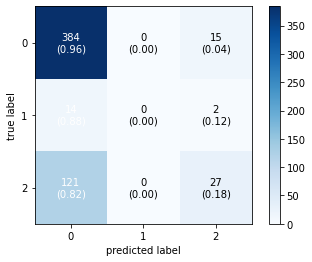

In [1359]:
from mlxtend.plotting import plot_confusion_matrix

class_names_target = target_name

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,)

In [1360]:
conf_mat.diagonal().sum()/conf_mat.sum()

0.7300177619893428

In [1361]:
err = 1 - acc
err * 100

26.998223801065723

In [1339]:
err_default = 6
#range de la boucle
neighbors = range(2, 101)
errors = []

for k in neighbors:
	knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1) 	# 
	knn.fit(x_train, y_train)
	err = round((1.0 - knn.score(x_test, y_test)) * 100, 3)
	errors.append(err)
	print(f"\n\nResults : knn = {knn.n_neighbors} => err_test = {err}\n")
	print(f'Improvement of {-(err - err_default)}%\n\n')



Results : knn = 2 => err_test = 29.84

Improvement of -23.84%




Results : knn = 3 => err_test = 31.439

Improvement of -25.439%




Results : knn = 4 => err_test = 28.419

Improvement of -22.419%




Results : knn = 5 => err_test = 29.84

Improvement of -23.84%




Results : knn = 6 => err_test = 29.307

Improvement of -23.307%




Results : knn = 7 => err_test = 28.774

Improvement of -22.774%




Results : knn = 8 => err_test = 28.242

Improvement of -22.242%




Results : knn = 9 => err_test = 28.774

Improvement of -22.774%




Results : knn = 10 => err_test = 28.419

Improvement of -22.419%




Results : knn = 11 => err_test = 28.597

Improvement of -22.597%




Results : knn = 12 => err_test = 28.064

Improvement of -22.064%




Results : knn = 13 => err_test = 28.597

Improvement of -22.597%




Results : knn = 14 => err_test = 29.13

Improvement of -23.13%




Results : knn = 15 => err_test = 28.952

Improvement of -22.952%




Results : knn = 16 => err_test = 28.952

Impro

Text(0.5, 0, 'neighbors')

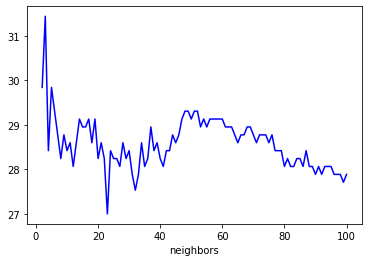

In [1340]:
from matplotlib import pyplot as plt

plt.plot(neighbors, errors, 'b')
plt.xlabel('neighbors')

In [1362]:
rf_netflix = pd.DataFrame({"neighbors" : neighbors, "errors" : errors})
rf_netflix = rf_netflix.sort_values('errors', ascending=True)
rf_netflix = rf_netflix.sort_values(['errors', 'neighbors'], ascending=[True, False])
rf_netflix.head(15)

,neighbors,errors
21,23,26.998
30,32,27.531
97,99,27.709
98,100,27.886
96,98,27.886
95,97,27.886
94,96,27.886
90,92,27.886
88,90,27.886
31,33,27.886


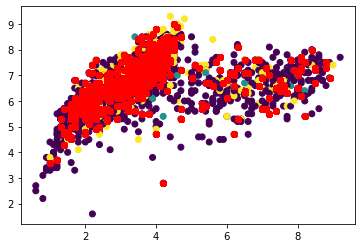

In [1363]:
plt.figure()
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c = y)
# indice des points mal classés par le clf
miss_class = np.where(y_test != y_pred)
miss_class = miss_class[0].tolist()
# les points mal classés (en rouge)
for idx in miss_class : 
    plt.scatter(x_test.iloc[idx:, 0], x_test.iloc[idx:, 1], c = 'red')

In [1253]:
knn1 = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
knn1.fit(x_train.iloc[:, [0, 1]], y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=1)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  colors='k',


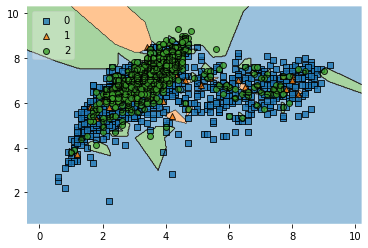

In [1254]:
#par défaut
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(np.array(x.iloc[:, [0, 1]]), np.array(y), clf=knn1, legend=2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  colors='k',


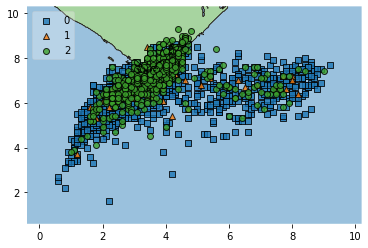

In [1255]:
knn90=KNeighborsClassifier(n_neighbors=90, n_jobs=-1)
knn90.fit(x_train.iloc[:, [0, 1]], y_train)
plot_decision_regions(np.array(x.iloc[:, [0, 1]]), np.array(y), clf=knn90, legend=2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  colors='k',


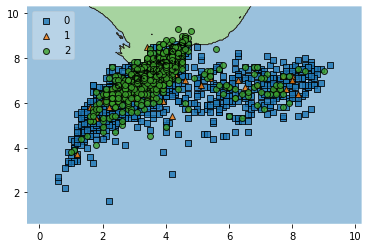

In [1364]:
knn21=KNeighborsClassifier(n_neighbors=23, n_jobs=-1)
knn21.fit(x_train.iloc[:, [0, 1]], y_train)
plot_decision_regions(np.array(x.iloc[:, [0, 1]]), np.array(y), clf=knn21, legend=2)

# Random Forest

In [1257]:
x = x.drop('cl_km',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)


In [1258]:
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
rf

RandomForestClassifier(n_jobs=-1, random_state=42)

In [1259]:
rf.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [1260]:
y_pred = rf.predict(x_test)
y_pred

array([0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 1, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,

In [1261]:
conf_mat = metrics.confusion_matrix(y_test, y_pred)
conf_mat
pd.DataFrame(conf_mat, columns=target_name, index=target_name)

,< 30 minutes,1-2 hour,> 2 hrs
< 30 minutes,354,5,40
1-2 hour,12,0,4
> 2 hrs,101,4,43


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7f94035f90>)

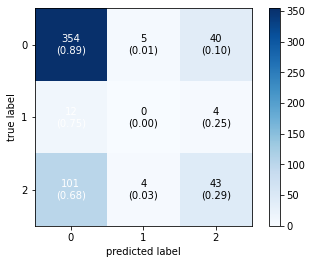

In [1262]:
plot_confusion_matrix(conf_mat=conf_mat,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                )

In [1263]:
(1 - metrics.accuracy_score(y_test, y_pred)) * 100

29.484902309058615

In [1264]:
max_depths = [i for i in np.linspace(start = 1, stop = 10, num = 10, dtype=int)]
max_depths.append(None)
max_depths

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None]

In [1265]:
n_estimators = np.linspace(start = 1, stop = 300, num = 60, dtype = int)
n_estimators

array([  1,   6,  11,  16,  21,  26,  31,  36,  41,  46,  51,  56,  61,
        66,  71,  77,  82,  87,  92,  97, 102, 107, 112, 117, 122, 127,
       132, 137, 142, 147, 153, 158, 163, 168, 173, 178, 183, 188, 193,
       198, 203, 208, 213, 218, 223, 229, 234, 239, 244, 249, 254, 259,
       264, 269, 274, 279, 284, 289, 294, 300])

In [1266]:
err_default = 9.99
errors = []
for estimator in n_estimators :
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1, random_state=42)
   rf.fit(x_train, y_train)
   err = round((1.0 - rf.score(x_test, y_test)) * 100, 3)
   errors.append(err)
   print(f"\n\nResults : n_estimators = {rf.n_estimators} => err_test = {err}\n\n")
   print('Improvement of {:0.2f}%.'.format(err_default - err))



Results : n_estimators = 1 => err_test = 38.366


Improvement of -28.38%.


Results : n_estimators = 6 => err_test = 31.794


Improvement of -21.80%.


Results : n_estimators = 11 => err_test = 30.018


Improvement of -20.03%.


Results : n_estimators = 16 => err_test = 29.663


Improvement of -19.67%.


Results : n_estimators = 21 => err_test = 30.195


Improvement of -20.20%.


Results : n_estimators = 26 => err_test = 30.018


Improvement of -20.03%.


Results : n_estimators = 31 => err_test = 30.728


Improvement of -20.74%.


Results : n_estimators = 36 => err_test = 28.774


Improvement of -18.78%.


Results : n_estimators = 41 => err_test = 28.952


Improvement of -18.96%.


Results : n_estimators = 46 => err_test = 29.485


Improvement of -19.49%.


Results : n_estimators = 51 => err_test = 29.307


Improvement of -19.32%.


Results : n_estimators = 56 => err_test = 29.663


Improvement of -19.67%.


Results : n_estimators = 61 => err_test = 29.84


Improvement of -19.85%.




Text(0, 0.5, 'err_test')

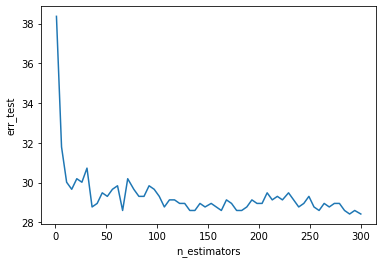

In [1267]:
plt.plot(n_estimators, errors, label = 'test')
plt.xlabel('n_estimators')
plt.ylabel('err_test')

In [1268]:
n_estimators = np.linspace(start = 1, stop = 300, num = 60, dtype = int)
errors = []
errors_test, errors_train, accuracy_oob = [], [], []
for estimator in n_estimators :
    rf = RandomForestClassifier(n_estimators=estimator, oob_score = True, n_jobs=-1)
    rf.fit(x_train, y_train)
    y_pred = rf.predict(x_test)
    err_test = round((1.0 - metrics.accuracy_score(y_test, y_pred)) * 100, 3)
    errors_test.append(err_test)
    train_pred = rf.predict(x_train)
    err_train = round((1.0 - metrics.accuracy_score(y_train, train_pred)) * 100, 3)
    errors_train.append(err_train)
    acc_oob = round(rf.oob_score_ * 100, 3)
    accuracy_oob.append(acc_oob)
    print(f"\n\nResults : n_estimators = {rf.n_estimators} => acc_oob = {acc_oob}, err_test = {err_test}, err_train = {err_train}\n\n")

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,




Results : n_estimators = 1 => acc_oob = 66.533, err_test = 38.366, err_train = 15.2




Results : n_estimators = 6 => acc_oob = 65.289, err_test = 31.261, err_train = 6.889




/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,




Results : n_estimators = 11 => acc_oob = 66.267, err_test = 31.083, err_train = 3.556




Results : n_estimators = 16 => acc_oob = 67.289, err_test = 30.906, err_train = 2.933




Results : n_estimators = 21 => acc_oob = 67.467, err_test = 28.419, err_train = 2.356




Results : n_estimators = 26 => acc_oob = 68.711, err_test = 29.485, err_train = 2.4




Results : n_estimators = 31 => acc_oob = 69.022, err_test = 29.84, err_train = 2.311




Results : n_estimators = 36 => acc_oob = 69.556, err_test = 29.84, err_train = 2.222




Results : n_estimators = 41 => acc_oob = 68.622, err_test = 28.952, err_train = 2.133




Results : n_estimators = 46 => acc_oob = 69.2, err_test = 29.84, err_train = 2.133




Results : n_estimators = 51 => acc_oob = 68.711, err_test = 29.84, err_train = 2.0




Results : n_estimators = 56 => acc_oob = 68.844, err_test = 29.84, err_train = 2.0




Results : n_estimators = 61 => acc_oob = 68.089, err_test = 29.13, err_train = 1.956




Results : n_estimators

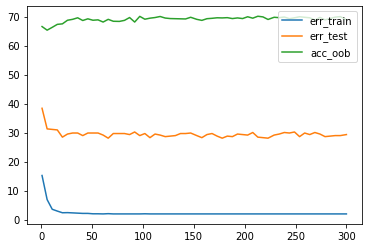

In [1269]:
plt.plot(n_estimators, errors_train, label = 'err_train')
plt.plot(n_estimators, errors_test, label = 'err_test')
plt.plot(n_estimators, accuracy_oob, label = 'acc_oob')
plt.legend()

In [1270]:
1-rf.oob_score_

0.31066666666666665

In [1271]:
errors = []
err_default = 9.99
for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1, random_state=42)
    rf.fit(x_train, y_train)
    err = round((1.0 - rf.score(x_test, y_test)) * 100, 3)
    errors.append(err)
    print(f"\n\nResults : max_depth = {rf.max_depth} => err_test = {err}\n")
    print(f'Improvement of {err_default - err}%\n\n')



Results : max_depth = 1 => err_test = 29.13

Improvement of -19.14%




Results : max_depth = 2 => err_test = 29.13

Improvement of -19.14%




Results : max_depth = 3 => err_test = 28.242

Improvement of -18.252000000000002%




Results : max_depth = 4 => err_test = 27.353

Improvement of -17.363%




Results : max_depth = 5 => err_test = 26.998

Improvement of -17.008000000000003%




Results : max_depth = 6 => err_test = 27.353

Improvement of -17.363%




Results : max_depth = 7 => err_test = 26.998

Improvement of -17.008000000000003%




Results : max_depth = 8 => err_test = 26.11

Improvement of -16.119999999999997%




Results : max_depth = 9 => err_test = 25.4

Improvement of -15.409999999999998%




Results : max_depth = 10 => err_test = 26.643

Improvement of -16.653%




Results : max_depth = None => err_test = 29.485

Improvement of -19.494999999999997%




Text(0.5, 0, 'max_depths')

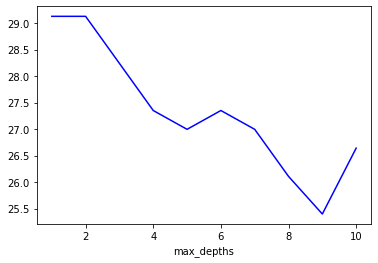

In [1272]:
plt.plot(max_depths, errors, 'b')
plt.xlabel('max_depths')

In [1273]:
from sklearn.model_selection import GridSearchCV

In [1274]:
param = { "max_features" : list(range(2, 5, 1)), "max_depth" : [2, 3, 4, 5, None] }
param

{'max_depth': [2, 3, 4, 5, None], 'max_features': [2, 3, 4]}

In [1275]:
rf = GridSearchCV(RandomForestClassifier(n_estimators=250, random_state = 42),
			        param, cv=5, n_jobs = -1)
rf
rf.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, None],
                         'max_features': [2, 3, 4]})

In [1347]:
pd.DataFrame(rf.cv_results_)[['param_max_features', 'mean_test_score', 'params']].sort_values('mean_test_score',ascending=False)

,param_max_features,mean_test_score,params
10,3,0.719111,"{'max_depth': 5, 'max_features': 3}"
9,2,0.717333,"{'max_depth': 5, 'max_features': 2}"
11,4,0.716000,"{'max_depth': 5, 'max_features': 4}"
3,2,0.715556,"{'max_depth': 3, 'max_features': 2}"
8,4,0.715556,"{'max_depth': 4, 'max_features': 4}"
7,3,0.715111,"{'max_depth': 4, 'max_features': 3}"
4,3,0.712889,"{'max_depth': 3, 'max_features': 3}"
6,2,0.712000,"{'max_depth': 4, 'max_features': 2}"
5,4,0.712000,"{'max_depth': 3, 'max_features': 4}"
0,2,0.708000,"{'max_depth': 2, 'max_features': 2}"


In [1277]:
1-rf.score(x_test, y_test)

0.27175843694493784

In [1289]:
df_netflix = df_netflix.drop('Runtime',axis=1)


In [1290]:
df_netflix

,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received
0,4.3,7.9,98.0,82.0,74.0
1,7.0,5.8,79.0,69.0,1.0
15,3.5,8.4,68.0,59.0,112.0
16,2.8,6.5,52.0,51.0,26.0
17,4.4,8.1,96.0,85.0,46.0
...,...,...,...,...,...
15459,3.0,6.8,63.0,52.0,3.0
15460,2.0,4.9,25.0,45.0,11.0
15461,1.3,5.3,2.0,22.0,1.0
15463,1.6,6.1,8.0,29.0,1.0


In [1292]:
feature = [column for column in df_netflix]
importance = np.round(rf.best_estimator_.feature_importances_ * 100, 2)
feature, importance
feature_importance = pd.DataFrame({'feature' : df_netflix.columns, 'importance' : importance})
feature_importance

,feature,importance
0,Hidden Gem Score,15.14
1,IMDb Score,32.37
2,Rotten Tomatoes Score,16.15
3,Metacritic Score,10.49
4,Awards Received,25.85


In [1293]:
feature_importances = rf.best_estimator_.feature_importances_
pd.DataFrame({'feature' : df_netflix.columns, 'importance' : feature_importances}).sort_values('importance', ascending=False)

,feature,importance
1,IMDb Score,0.323665
4,Awards Received,0.258517
2,Rotten Tomatoes Score,0.161511
0,Hidden Gem Score,0.151384
3,Metacritic Score,0.104922


In [1294]:
rf.best_estimator_.feature_importances_

array([0.15138426, 0.32366522, 0.1615108 , 0.10492244, 0.25851728])